In [1]:
import pandas as pd
import sqlite3


using sqlite library to read our data base 

In [2]:
conn = sqlite3.connect("database.sqlite")

use pandas to read our sql query where we need to create a data frame that has all the tables included in database

In [3]:
df = pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table';", conn)
df

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


create a dataframe for each table

In [4]:
Player_Attributes=pd.read_sql_query("select * from Player_Attributes;",conn)
Player=pd.read_sql_query("select * from Player;",conn)
Match=pd.read_sql_query("select * from Match;",conn)
League=pd.read_sql_query("select * from League;",conn)
Country=pd.read_sql_query("select * from Country;",conn)
Team=pd.read_sql_query("select * from Team;",conn)
Team_Attributes=pd.read_sql_query("select * from Team_Attributes;",conn)

wrangle each table 

In [5]:
Player_Attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [6]:
Player_Attributes.shape

(183978, 42)

In [7]:
Player_Attributes.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [8]:
Player_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [9]:
Player_Attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [10]:
Player_Attributes.duplicated().sum()

0

In [11]:
Player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [12]:
Player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 518.5+ KB


In [13]:
Player.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


In [14]:
Player.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [15]:
Player.duplicated().sum()

0

In [16]:
Match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
Match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 21.8+ MB


In [18]:
Match.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [19]:
Match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [20]:
Match.duplicated().sum()

0

In [21]:
League

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [22]:
League.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 284.0+ bytes


In [23]:
League.describe()

,id,country_id
count,11.000000,11.000000
mean,12452.090909,12452.090909
std,8215.308472,8215.308472
min,1.000000,1.000000
25%,6289.000000,6289.000000
50%,13274.000000,13274.000000
75%,18668.000000,18668.000000
max,24558.000000,24558.000000


In [24]:
League.isnull().sum()

id            0
country_id    0
name          0
dtype: int64

In [25]:
League.duplicated().sum()

0

In [26]:
Country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [27]:
Country.shape

(11, 2)

In [28]:
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [29]:
Country.describe()

,id
count,11.000000
mean,12452.090909
std,8215.308472
min,1.000000
25%,6289.000000
50%,13274.000000
75%,18668.000000
max,24558.000000


In [30]:
Team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [31]:
Team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 9.4+ KB


In [32]:
Team.describe()

,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


In [33]:
Team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [34]:
Team.duplicated().sum()

0

In [66]:
Team_Attributes

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [36]:
Team_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [37]:
Team_Attributes.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [38]:
Team_Attributes.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [39]:
Team_Attributes.duplicated().sum()

0

# Questions
What teams improved the most over the time period? 

Which players had the most penalties? 

What team attributes lead to the most victories?

what is the impact of playing in home land or remotely in different seasons ?

join the most columns from all the tables that we will need in the following steps

In [40]:
#use pandas to read sql query
data=pd.read_sql_query("""with t1 as (
select * 
from (select m.id, m.season ,m.stage ,m.home_team_goal,m.away_team_goal, T.team_long_name , T.team_short_name  , p.player_name ,m.away_team_goal,m.home_team_goal ,c.name as country 
                            from Match as m 
                            left join Team as T
                            on T.id=m.id
                            left join Player as p
                            on p.id=m.id
                            left join country as c
                            on c.id=m.id
                            left join league as L
                            on L.id=m.id
                            where p.player_name != "None"  and m.id != "None")) ,
t2 as (select *from Player_Attributes order by Player_Attributes.penalties Desc) ,
t3 as( select * from Team_Attributes group by Team_Attributes.buildUpPlaySpeed ) 
select * from t1
left join t2 on t2.id=t1.id 
left join t3 on t3.id =t1.id
order by t2.penalties Desc

                             ;""",conn)

In [41]:
data

,id,season,stage,home_team_goal,away_team_goal,team_long_name,team_short_name,player_name,away_team_goal:1,home_team_goal:1,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,2960,2011/2012,18,0,2,None,None,Emanuel Rivas,2,0,...,NaN,None,None,NaN,None,NaN,None,NaN,None,None
1,2961,2011/2012,18,1,1,None,None,Emanuel Sarki,1,1,...,NaN,None,None,NaN,None,NaN,None,NaN,None,None
2,2962,2011/2012,18,1,1,None,None,Emanuele Belardi,1,1,...,NaN,None,None,NaN,None,NaN,None,NaN,None,None
3,2963,2011/2012,18,5,0,None,None,Emanuele Calaio,0,5,...,NaN,None,None,NaN,None,NaN,None,NaN,None,None
4,4917,2008/2009,22,1,0,None,None,Jesus Datolo,0,1,...,NaN,None,None,NaN,None,NaN,None,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11055,9377,2013/2014,13,2,3,None,None,Saidi Ntibazonkiza,3,2,...,NaN,None,None,NaN,None,NaN,None,NaN,None,None
11056,9648,2014/2015,1,2,0,None,None,Semir Stilic,0,2,...,NaN,None,None,NaN,None,NaN,None,NaN,None,None
11057,9727,2014/2015,18,0,0,None,None,Shaleum Logan,0,0,...,NaN,None,None,NaN,None,NaN,None,NaN,None,None
11058,9920,2014/2015,6,1,0,None,None,Stefan Nikolic,0,1,...,NaN,None,None,NaN,None,NaN,None,NaN,None,None


In [42]:
#drop the ids columns in order not to let them affect the heat map readings in the next step
data.drop(['id' ,'player_api_id','player_fifa_api_id'],axis=1,inplace=True)

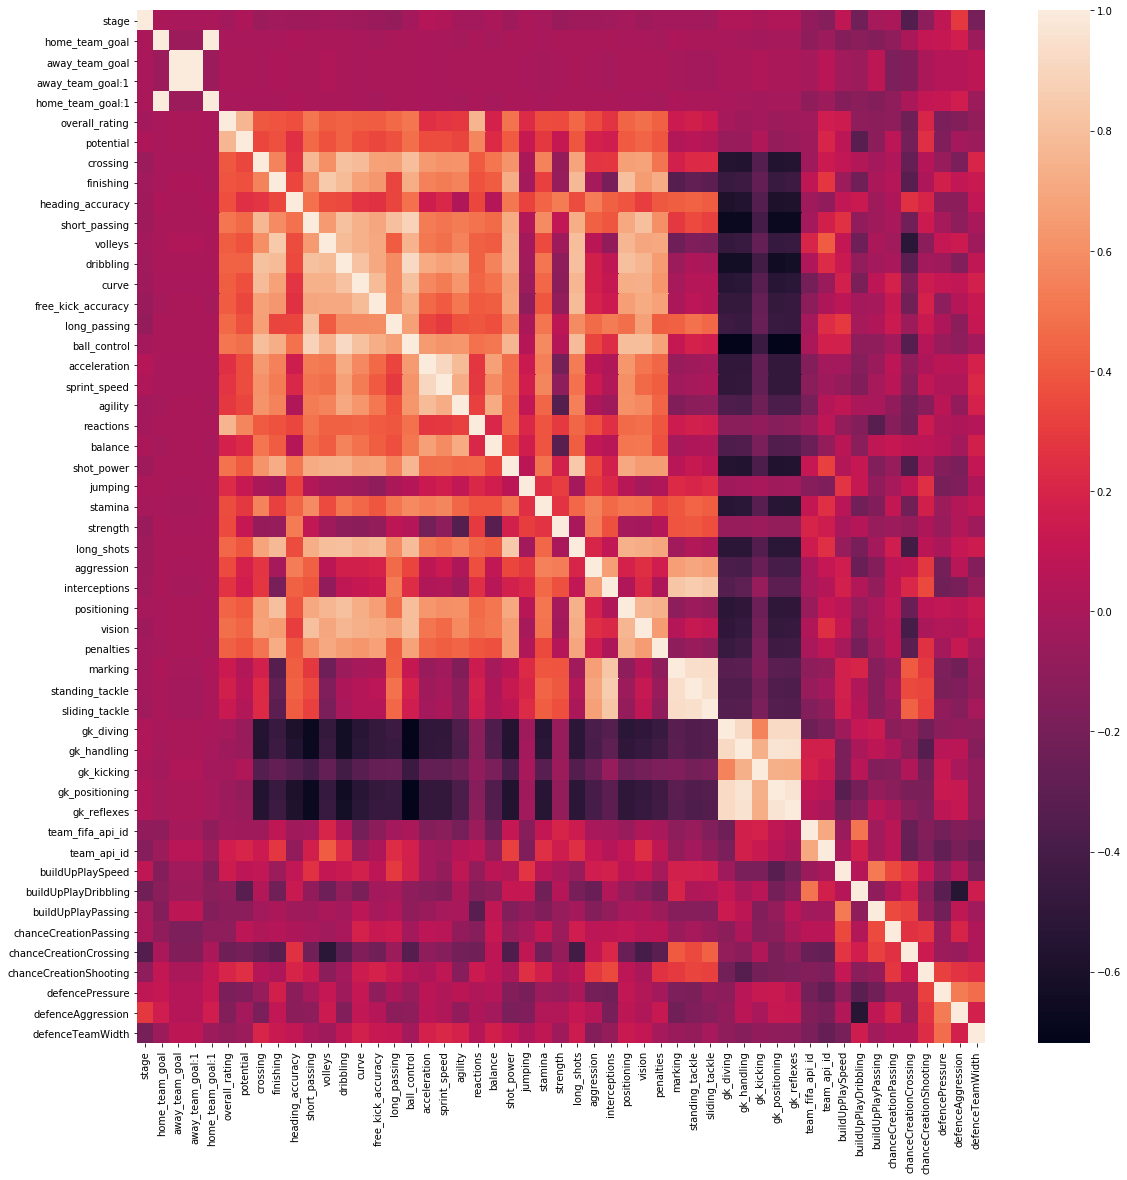

In [43]:
#use seaborn to plot a heat map that allows us to know how hard the numeric values from different columns correlate with each others
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
fig, ax = plt.subplots(figsize=(19,19))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,ax=ax)

from this map we find that the boxes in dark means there is high correlation between variable of this area and vice verca , the lighter the color the weaker the correlation becomes

In [44]:
#get rid of null values for name
data.player_name.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [45]:
data.team_long_name.dropna(inplace=True)

In [46]:
# i used https://www.kaggle.com/parulpandey/world-coordinates as a refrence for the following lines of code to plot a map
co_ord = pd.read_csv("world_coordinates.csv")
co_ord

,Code,Country,latitude,longitude
0,AD,Andorra,42.546245,1.601554
1,AE,United Arab Emirates,23.424076,53.847818
2,AF,Afghanistan,33.939110,67.709953
3,AG,Antigua and Barbuda,17.060816,-61.796428
4,AI,Anguilla,18.220554,-63.068615
...,...,...,...,...
239,YE,Yemen,15.552727,48.516388
240,YT,Mayotte,-12.827500,45.166244
241,ZA,South Africa,-30.559482,22.937506
242,ZM,Zambia,-13.133897,27.849332


In [47]:
new_row_1 = {'Code':'ENG', 'Country':"England", 'latitude':52.3555, 'longitude':1.1743}
new_row_2 = {'Code':'SCT', 'Country':"Scotland", 'latitude':56.8642, 'longitude':-4.2026}

#new_row_1 = {'Code':'ENG', 'Country':"England", 'latitude':1.1743, 'longitude':52.3555}
#new_row_2 = {'Code':'SCT', 'Country':"Scotland", 'latitude':4.2026, 'longitude':56.4907}

co_ord = co_ord.append(new_row_1, ignore_index=True)
co_ord = co_ord.append(new_row_2, ignore_index=True)
maping = co_ord[co_ord["Country"].isin(Country["name"])]
maping


,Code,Country,latitude,longitude
19,BE,Belgium,50.503887,4.469936
40,CH,Switzerland,46.818188,8.227512
53,DE,Germany,51.165691,10.451526
64,ES,Spain,40.463667,-3.749220
71,FR,France,46.227638,2.213749
107,IT,Italy,41.871940,12.567380
162,NL,Netherlands,52.132633,5.291266
175,PL,Poland,51.919438,19.145136
180,PT,Portugal,39.399872,-8.224454
244,ENG,England,52.355500,1.174300


In [48]:
# i used  https://www.kaggle.com/muhammadayman/sqlite-pandas-and-visuals as refrence in the following lines of code
maping = maping.assign(League_name = ['Belgium Jupiler League'
                                   ,'Switzerland Super League'
                                   ,'Germany 1. Bundesliga'
                                   ,'Spain LIGA BBVA'
                                   ,'France Ligue 1'
                                   ,'Italy Serie A'
                                   ,'Netherlands Eredivisie'
                                   ,'Poland Ekstraklasa'
                                   ,'Portugal Liga ZON Sagres'
                                   ,'England Premier League'
                                   ,'Scotland Premier League'])

maping

,Code,Country,latitude,longitude,League_name
19,BE,Belgium,50.503887,4.469936,Belgium Jupiler League
40,CH,Switzerland,46.818188,8.227512,Switzerland Super League
53,DE,Germany,51.165691,10.451526,Germany 1. Bundesliga
64,ES,Spain,40.463667,-3.749220,Spain LIGA BBVA
71,FR,France,46.227638,2.213749,France Ligue 1
107,IT,Italy,41.871940,12.567380,Italy Serie A
162,NL,Netherlands,52.132633,5.291266,Netherlands Eredivisie
175,PL,Poland,51.919438,19.145136,Poland Ekstraklasa
180,PT,Portugal,39.399872,-8.224454,Portugal Liga ZON Sagres
244,ENG,England,52.355500,1.174300,England Premier League


In [49]:
import folium
incidents = folium.Map(location=[54.5260, 15.2551], zoom_start=3.4,tiles='Stamen Terrain')
# loop through the 100 crimes and add each to the incidents feature group
for lat, log,Country,League in zip( maping["latitude"],maping["longitude"],maping["Country"],maping["League_name"]):
    folium.CircleMarker(
            [lat, log],
        #circle characterisitics
            radius=10,
            popup = ('<strong>name</strong>: ' + str(League) + '<br>'
                     '<strong>Nationality</strong>: ' + str(Country).capitalize()), 
            color='purple',
            fill_color='purple',
            fill_opacity=0.5
        ).add_to(incidents)
incidents

In [50]:
data.penalties.describe()

count    11021.000000
mean        55.227656
std         14.981513
min          6.000000
25%         46.000000
50%         57.000000
75%         66.000000
max         94.000000
Name: penalties, dtype: float64

which player has max penalty ?

In [52]:
#create data frame that has the player's name and penalties
df=pd.read_sql_query("""select p.player_name , Pa.penalties
                    from player as p
                    left join Player_Attributes as  Pa
                    on Pa.id=p.id
                    where p.player_name != 'None' & p.player_name != 'NaN' 
                    ;""",conn)

In [53]:
#knowing that the max penality equals 94 , we will take the highest two values of penalties from the data frame
df=df.query('penalties>=93')

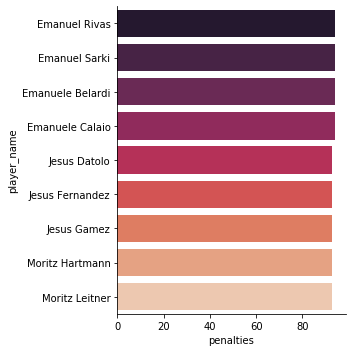

In [54]:
#use seaborn to plot the players of highest penalties
sns.catplot(y='player_name' , x='penalties' ,data=df ,kind='bar' , palette='rocket');

from this graph we notice that Emanuel Rivas , Emanuel Sarki , Emanuele Belardie and Emanuele Calaio had the highest penalties

what is the impact of playing in home land or remotly in different seasons ?

In [55]:
df2=pd.read_sql("select m.away_team_goal, m.home_team_goal , season from Match as m ; ",conn)

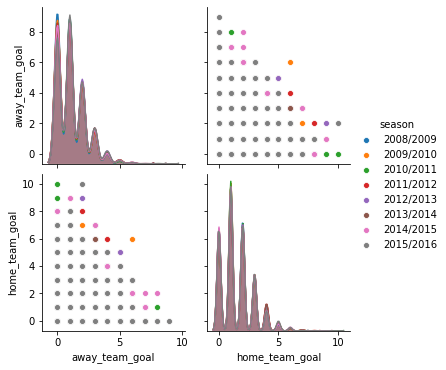

In [65]:
sns.pairplot(df2,hue='season' );

from this graph we notice that away team goals in 2015/2016 was extreamely higher than home team goal and the home team goal in 2010/2011 was to high than the away team goal

which team attribute lead to the most victory?

In [57]:
# use sql query to  select team attributes and join it with match home team goal and away team goal
df3=pd.read_sql_query("""select t.buildUpPlaySpeed, t.date ,t.buildUpPlaySpeedClass,t.buildUpPlayDribbling,t.buildUpPlayPassing,t.chanceCreationCrossing,t.chanceCreationPassing,t.chanceCreationShooting,t.defenceAggression,t.defencePressure,t.defenceTeamWidth , m.home_team_goal,m.away_team_goal
from team_attributes as t
left join Match as m
on m.id=t.id
where t.buildUpPlaySpeed >50
group by 10,11
order by m.home_team_goal desc ,away_team_goal desc""",conn)

In [58]:
df3

,buildUpPlaySpeed,date,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationCrossing,chanceCreationPassing,chanceCreationShooting,defenceAggression,defencePressure,defenceTeamWidth,home_team_goal,away_team_goal
0,55,2012-02-22 00:00:00,Balanced,NaN,37,43,59,53,49,58,58,6,1
1,72,2014-09-19 00:00:00,Fast,55.0,66,51,66,49,35,29,38,6,1
2,58,2012-02-22 00:00:00,Balanced,NaN,69,42,53,68,50,40,51,6,0
3,72,2011-02-22 00:00:00,Fast,NaN,57,47,70,49,63,28,62,6,0
4,69,2013-09-20 00:00:00,Fast,NaN,58,52,56,61,49,38,65,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,56,2011-02-22 00:00:00,Balanced,NaN,42,69,57,61,44,38,69,0,0
387,70,2012-02-22 00:00:00,Fast,NaN,55,46,40,60,42,38,62,0,0
388,66,2013-09-20 00:00:00,Balanced,NaN,62,55,56,61,49,36,62,0,0
389,53,2015-09-10 00:00:00,Balanced,41.0,69,45,48,43,41,29,36,0,0


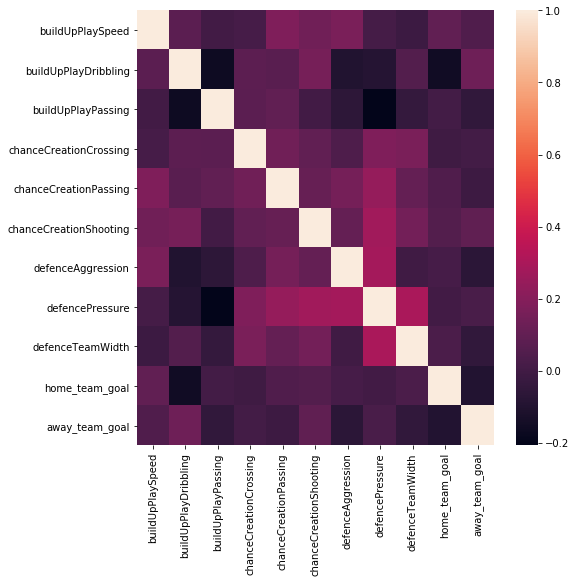

In [59]:
#the heat map to show the correlation between the columns of the new data frame
corr = df3.corr()
fig, ax = plt.subplots(figsize=(8,8))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,ax=ax)

from heat map we find that buildUpPlayDribbling affects the most on home team goals
while defence aggression and buildUpPlayPassing affects the most on away team goals

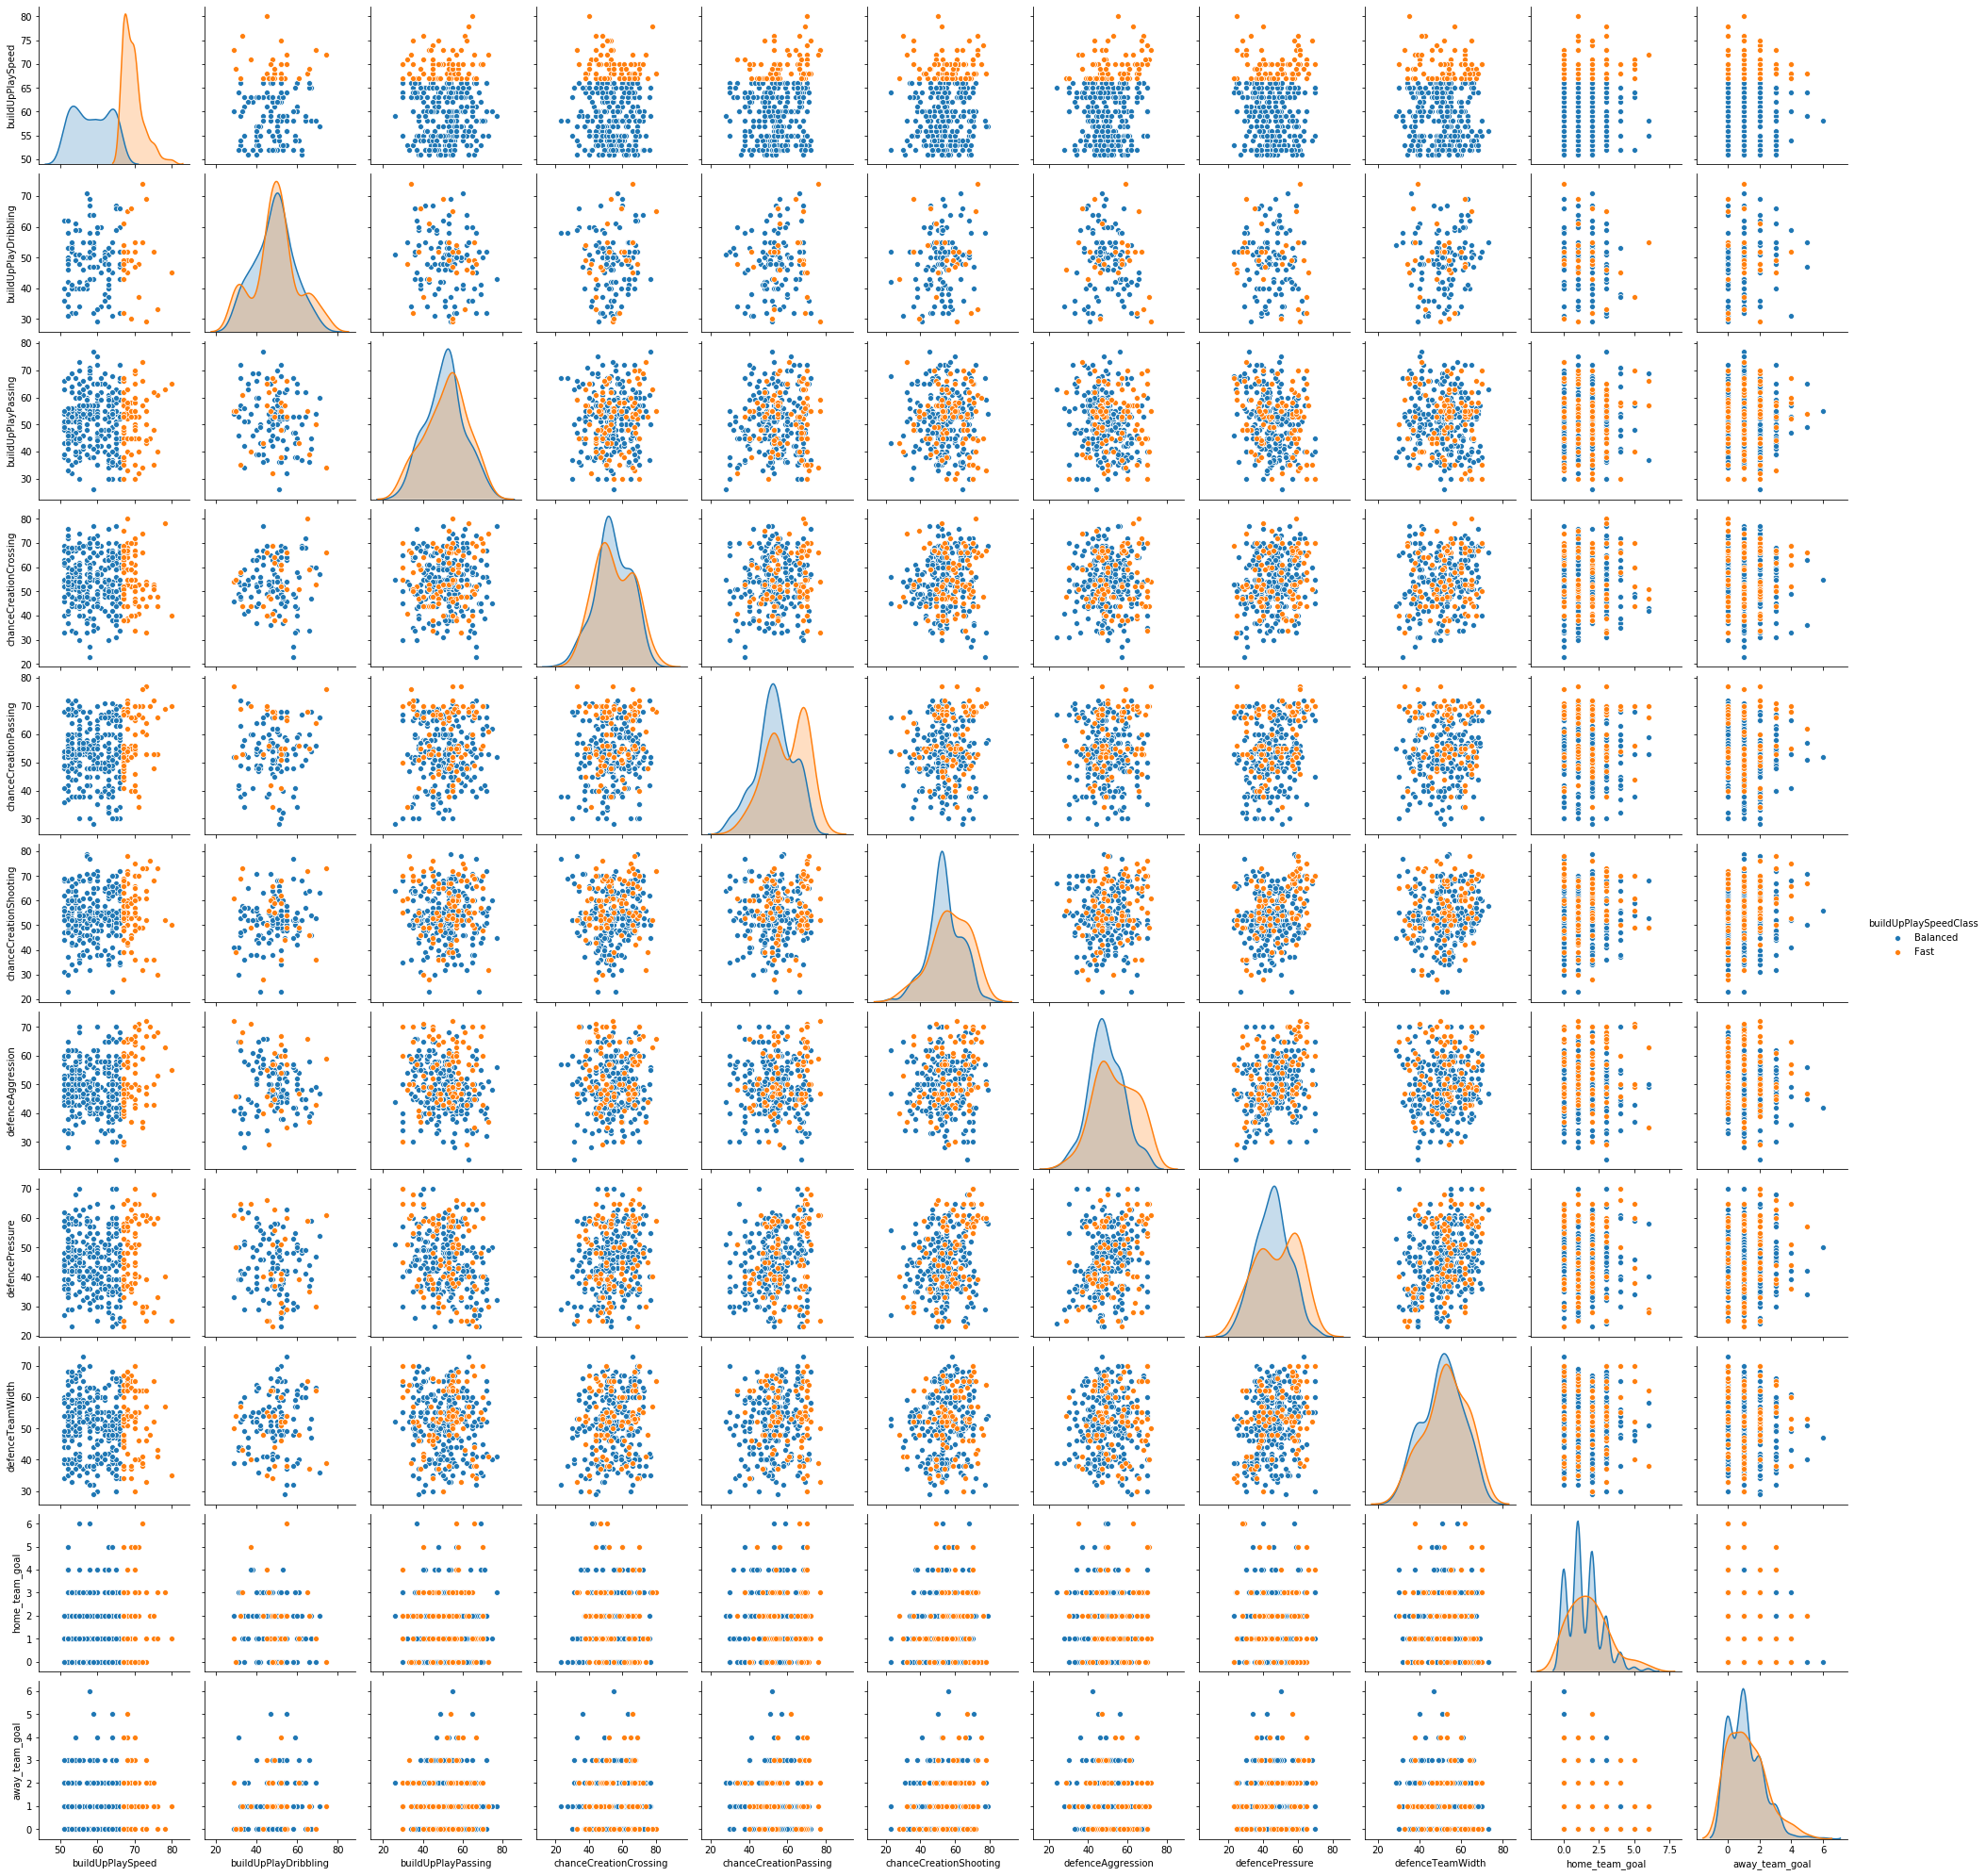

In [60]:
# seaborn pairplot to plot the realation btween all the numeric values in columns
sns.pairplot(df3,hue='buildUpPlaySpeedClass' , height=2.5);

we notic that the home team goal and away team attributes increases with increasing team attributes but they almost range from zero to 3


which team improved with time?

In [61]:
#select the columns i will need to show how teams improve through time
df4=pd.read_sql_query("""select buildUpPlaySpeed ,date ,team.team_long_name
from team_attributes as t
left join team as team
on team.id=t.id
order by date desc , buildUpPlaySpeed desc""",conn)

In [62]:
df4

,buildUpPlaySpeed,date,team_long_name
0,80,2015-09-10 00:00:00,None
1,77,2015-09-10 00:00:00,None
2,73,2015-09-10 00:00:00,None
3,71,2015-09-10 00:00:00,None
4,70,2015-09-10 00:00:00,None
...,...,...,...
1453,30,2010-02-22 00:00:00,None
1454,30,2010-02-22 00:00:00,None
1455,30,2010-02-22 00:00:00,None
1456,30,2010-02-22 00:00:00,None


In [63]:
#make sure that the date is of type date time
df4.date.astype('datetime64[ns]')

0      2015-09-10
1      2015-09-10
2      2015-09-10
3      2015-09-10
4      2015-09-10
          ...    
1453   2010-02-22
1454   2010-02-22
1455   2010-02-22
1456   2010-02-22
1457   2010-02-22
Name: date, Length: 1458, dtype: datetime64[ns]

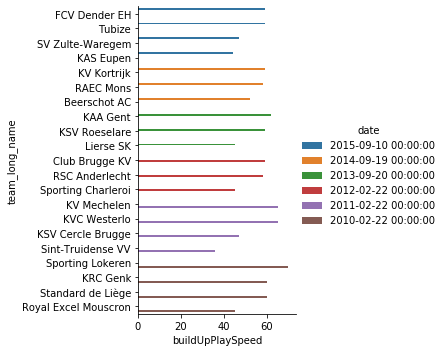

In [64]:
sns.catplot(y='team_long_name',x='buildUpPlaySpeed',hue='date',data = df4 , kind='bar' ,legend=True ) ;

we will notice from this graph that lately in 2015 FCV dender EH had the highest build up play speed 
the highest build up play speed from 2015 to 2013 was from sporting lokeren team 